# Census Income

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [6]:
#Importing libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV ,train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')

In [7]:
Census_ds=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
Census_ds

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Census data has 32560 rows and 15 columns

In [8]:
Census_ds.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [9]:
Census_ds.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [10]:
Census_ds.shape

(32560, 15)

In [11]:
Census_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are 6 numerical data and 9 categorical data. 

In [12]:
Census_ds.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [13]:
Census_ds.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in this dataset.

Unique Count in Each column

In [14]:
for i in Census_ds.columns:
    print(Census_ds[i].value_counts())
    print('\n')

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64


Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64


Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool       

In [15]:
Census_ds.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [16]:
Census_ds[Census_ds == ' ?'] = np.nan

Replacing the values with "?" to np.nan and then filling missing nan values

In [17]:
Census_ds

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [18]:
Census_ds['Workclass'] = Census_ds['Workclass'].fillna(Census_ds['Workclass'].mode()[0])

In [19]:
Census_ds['Occupation'] = Census_ds['Occupation'].fillna(Census_ds['Occupation'].mode()[0])

In [20]:
Census_ds['Native_country'] = Census_ds['Native_country'].fillna(Census_ds['Native_country'].mode()[0])

In [21]:
Census_ds.isin([' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [22]:
Census_ds.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [23]:
Census_ds.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [24]:
categorical_features = []
numerical_features = []

for index, feature in enumerate(Census_ds):
    if Census_ds[feature].nunique() < 10:
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

In [25]:
categorical_features

['Workclass', 'Marital_status', 'Relationship', 'Race', 'Sex', 'Income']

In [26]:
numerical_features

['Age',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Occupation',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country']

## EDA Analysis

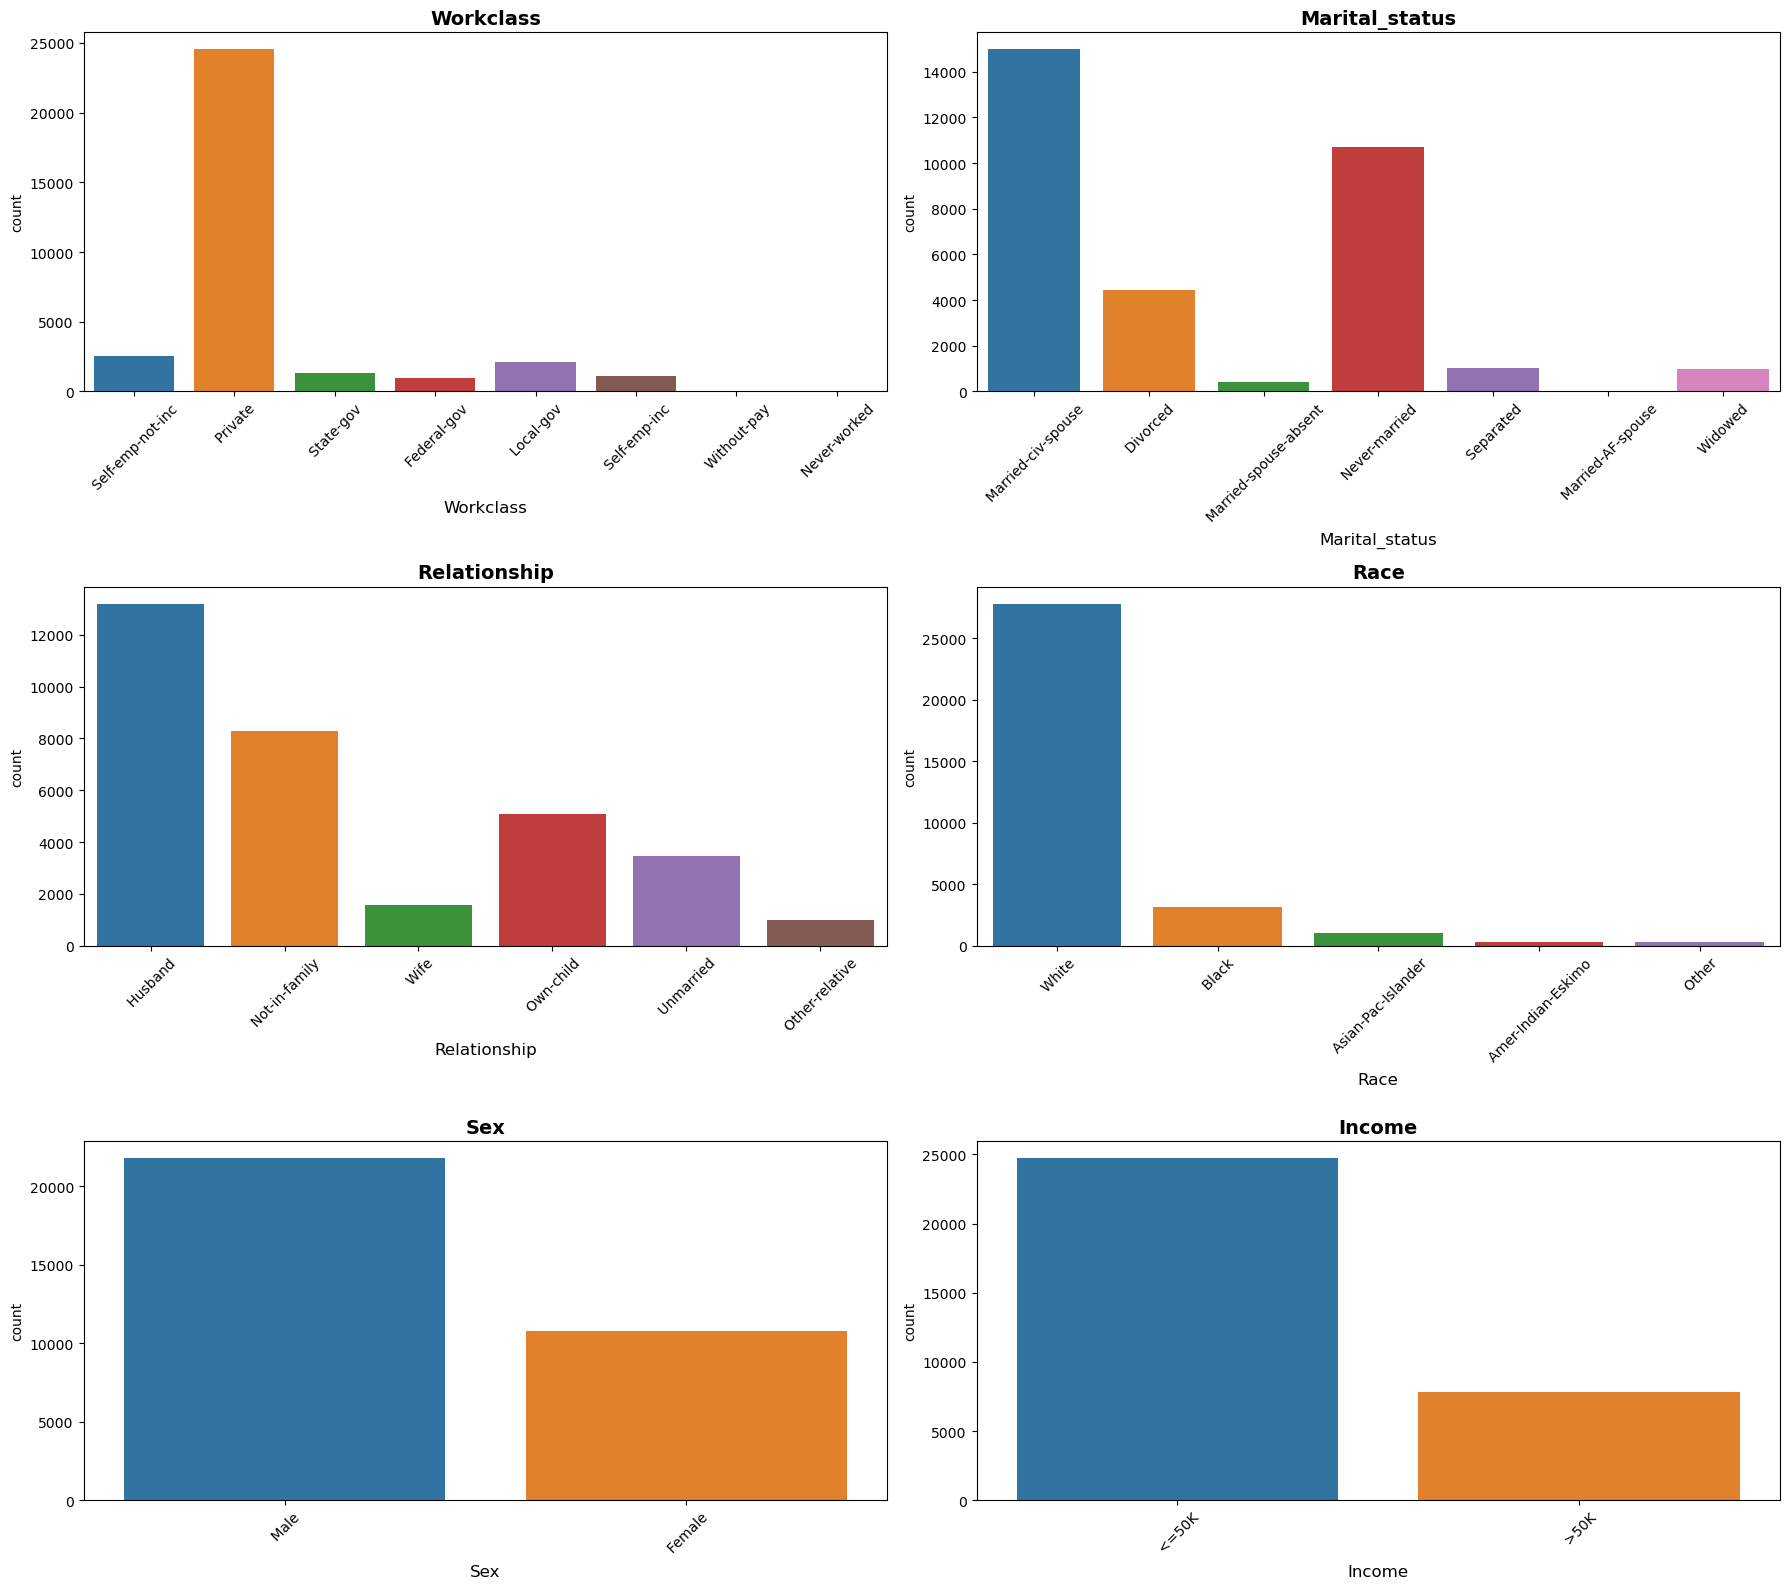

In [27]:
plt.figure(figsize=(18,16))
for index, feature in enumerate(categorical_features):
    plt.subplot(3, 2, index + 1)
    sns.countplot(x=Census_ds[feature])
    plt.title(feature, fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.xlabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

*The income <=50k has the highest count.
*Male has the hghest count
*In a family husband has the highest income
*Private work has the highest count

Text(0, 0.5, 'Fnlwgt')

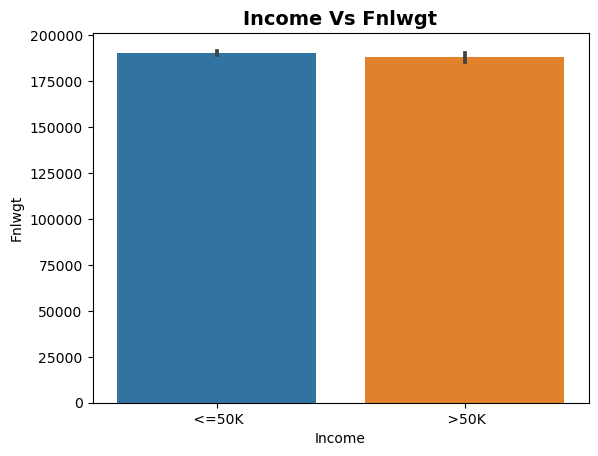

In [28]:

sns.barplot(x=Census_ds['Income'], y=Census_ds['Fnlwgt'])
plt.title('Income Vs Fnlwgt', fontsize=14, fontweight='bold')
plt.xlabel('Income', fontsize=10)
plt.ylabel('Fnlwgt', fontsize=10)

Text(0, 0.5, 'Age')

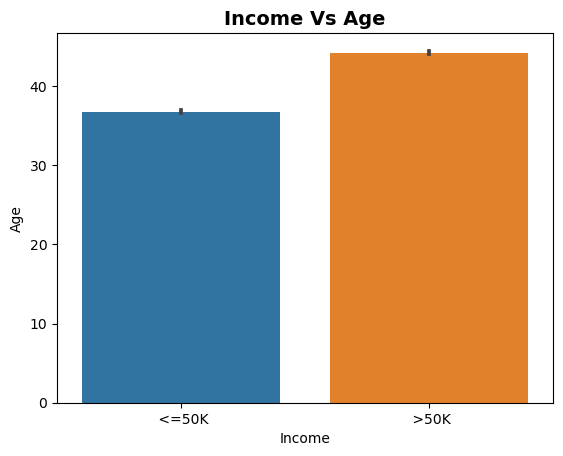

In [29]:

sns.barplot(x=Census_ds['Income'], y=Census_ds['Age'])
plt.title('Income Vs Age', fontsize=14, fontweight='bold')
plt.xlabel('Income', fontsize=10)
plt.ylabel('Age', fontsize=10)

People with age 40 has more than 50k has income

Text(0, 0.5, 'Hours_per_week')

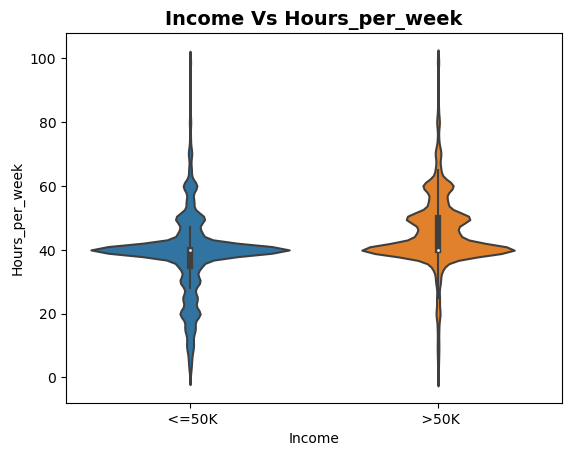

In [30]:
sns.violinplot(x=Census_ds['Income'], y=Census_ds['Hours_per_week'])
plt.title('Income Vs Hours_per_week', fontsize=14, fontweight='bold')
plt.xlabel('Income', fontsize=10)
plt.ylabel('Hours_per_week', fontsize=10)

Text(0, 0.5, 'Capital_loss')

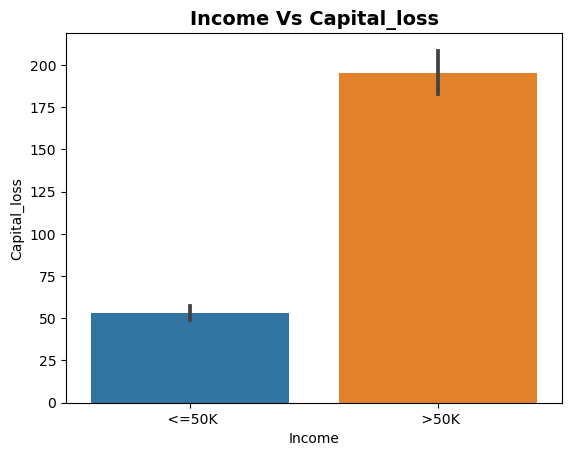

In [31]:
sns.barplot(x=Census_ds['Income'], y=Census_ds['Capital_loss'])
plt.title('Income Vs Capital_loss', fontsize=14, fontweight='bold')
plt.xlabel('Income', fontsize=10)
plt.ylabel('Capital_loss', fontsize=10)

Text(0, 0.5, 'Capital_gain')

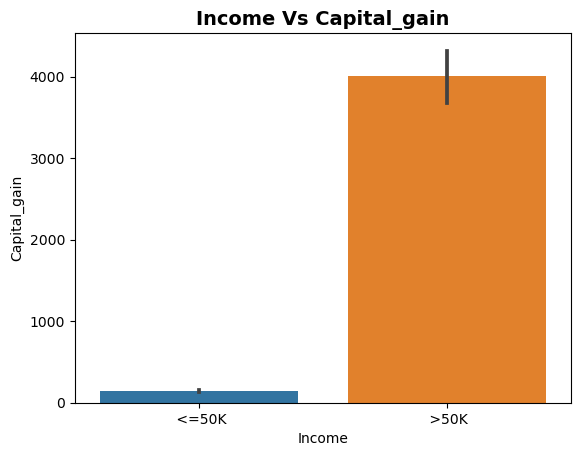

In [32]:
sns.barplot(x=Census_ds['Income'], y=Census_ds['Capital_gain'])
plt.title('Income Vs Capital_gain', fontsize=14, fontweight='bold')
plt.xlabel('Income', fontsize=10)
plt.ylabel('Capital_gain', fontsize=10)

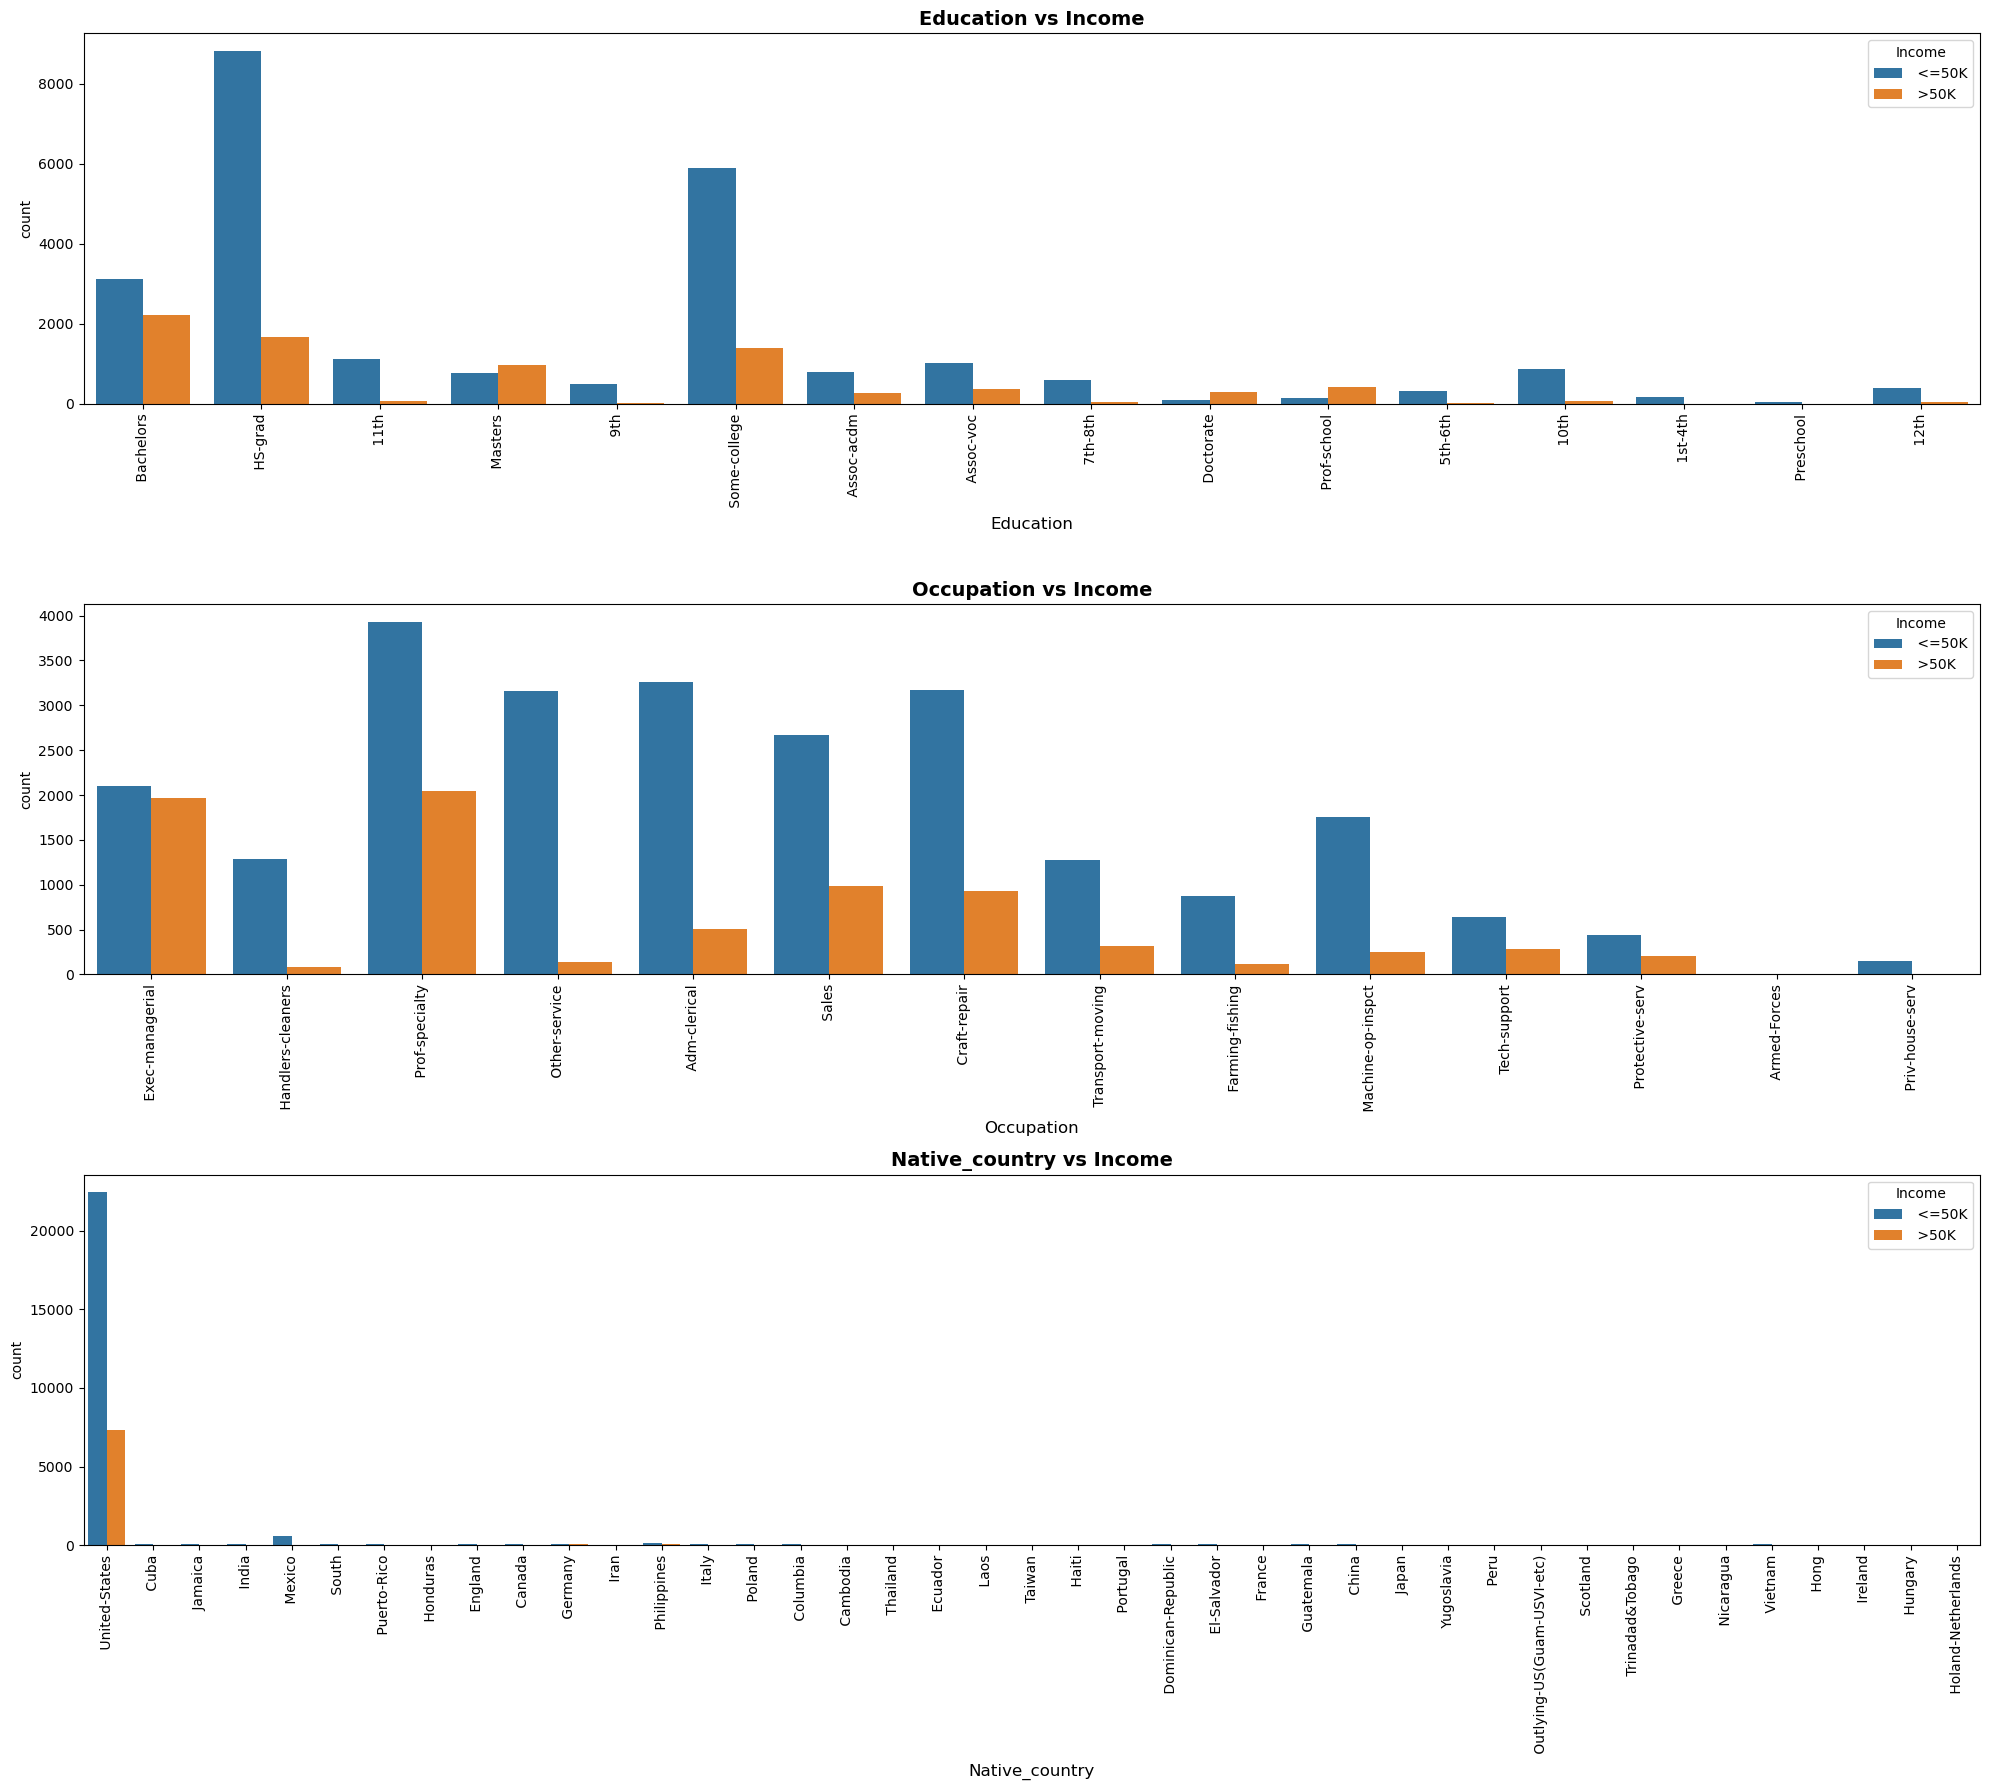

In [33]:
categorical_features = ['Education', 'Occupation', 'Native_country']

plt.figure(figsize=(20, 18))
for index, feature in enumerate(categorical_features):
    plt.subplot(3, 1, index + 1)
    sns.countplot(x=Census_ds[feature], hue=Census_ds['Income'])
    plt.title(f'{feature} vs Income', fontsize=14, fontweight='bold')
    plt.xticks(rotation=90)
    plt.xlabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

*Country "United States" has the highest income
*Occupation"prof_speciality" has the highest income


Converting Categorical Data into Numerical Data

In [35]:
categorical_feat=['Workclass', 'Marital_status', 'Relationship', 'Race', 'Sex', 'Income','Occupation','Education','Native_country']

In [36]:
le = LabelEncoder()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_feat:
    Census_ds[col] = label_encoder.fit_transform(Census_ds[col])

In [37]:
Census_ds.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [38]:
Census_dsCorr=Census_ds.corr()
Census_dsCorr

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,0.215995


<Axes: >

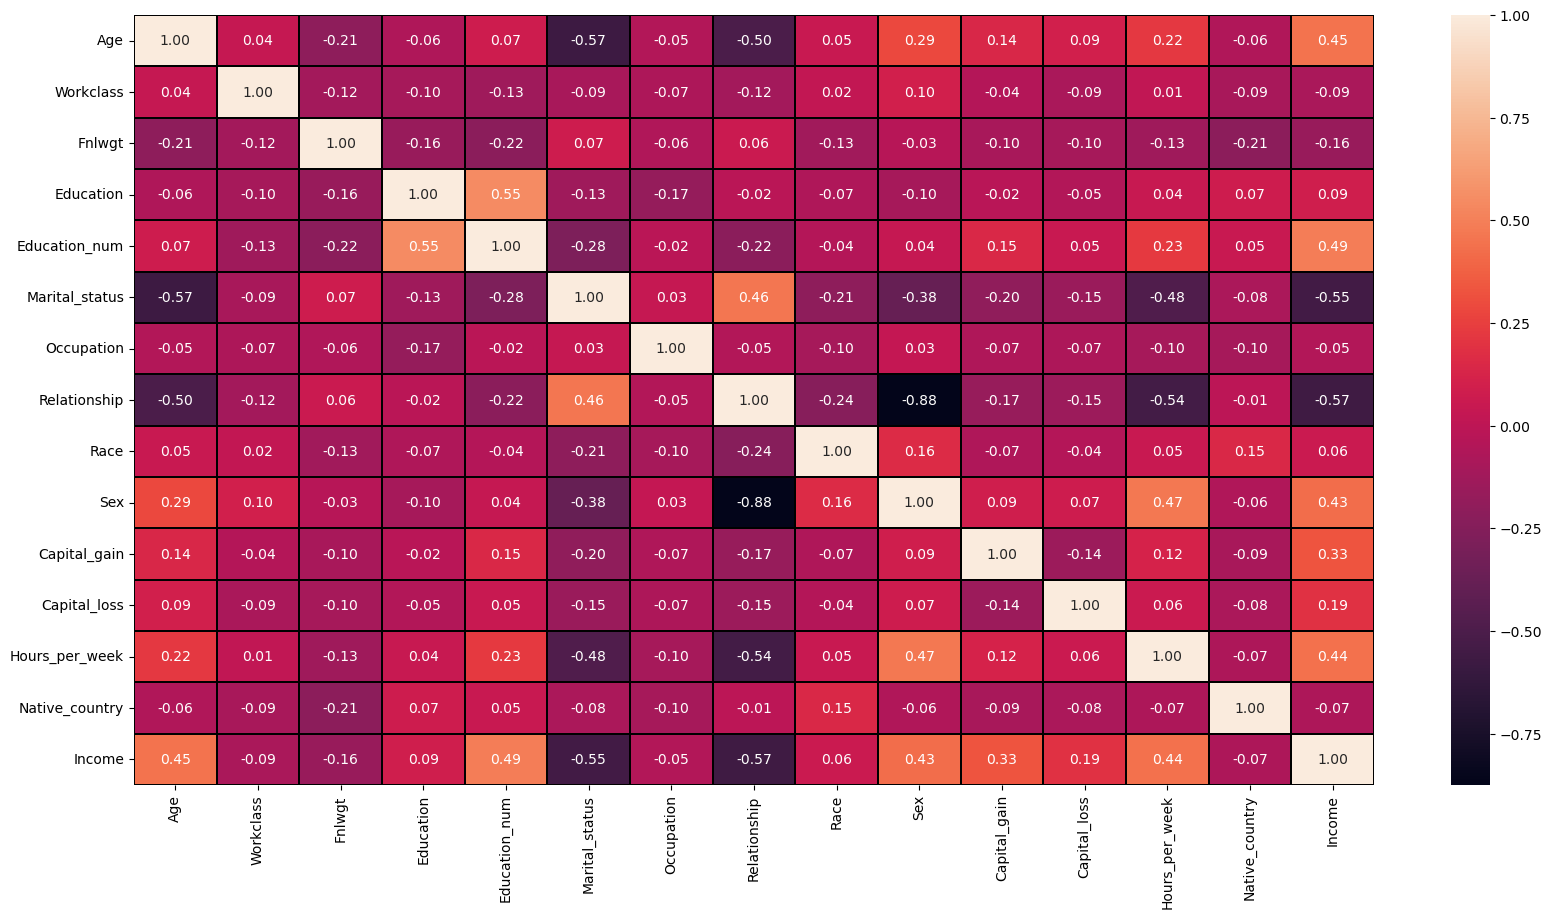

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(Census_dsCorr.corr(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')

Income is highly correlated with Marital Status and Relationship and viceversa

Age                  Axes(0.125,0.653529;0.133621x0.226471)
Workclass         Axes(0.285345,0.653529;0.133621x0.226471)
Fnlwgt             Axes(0.44569,0.653529;0.133621x0.226471)
Education         Axes(0.606034,0.653529;0.133621x0.226471)
Education_num     Axes(0.766379,0.653529;0.133621x0.226471)
Marital_status       Axes(0.125,0.381765;0.133621x0.226471)
Occupation        Axes(0.285345,0.381765;0.133621x0.226471)
Relationship       Axes(0.44569,0.381765;0.133621x0.226471)
Race              Axes(0.606034,0.381765;0.133621x0.226471)
Sex               Axes(0.766379,0.381765;0.133621x0.226471)
Capital_gain             Axes(0.125,0.11;0.133621x0.226471)
Capital_loss          Axes(0.285345,0.11;0.133621x0.226471)
Hours_per_week         Axes(0.44569,0.11;0.133621x0.226471)
Native_country        Axes(0.606034,0.11;0.133621x0.226471)
Income                Axes(0.766379,0.11;0.133621x0.226471)
dtype: object

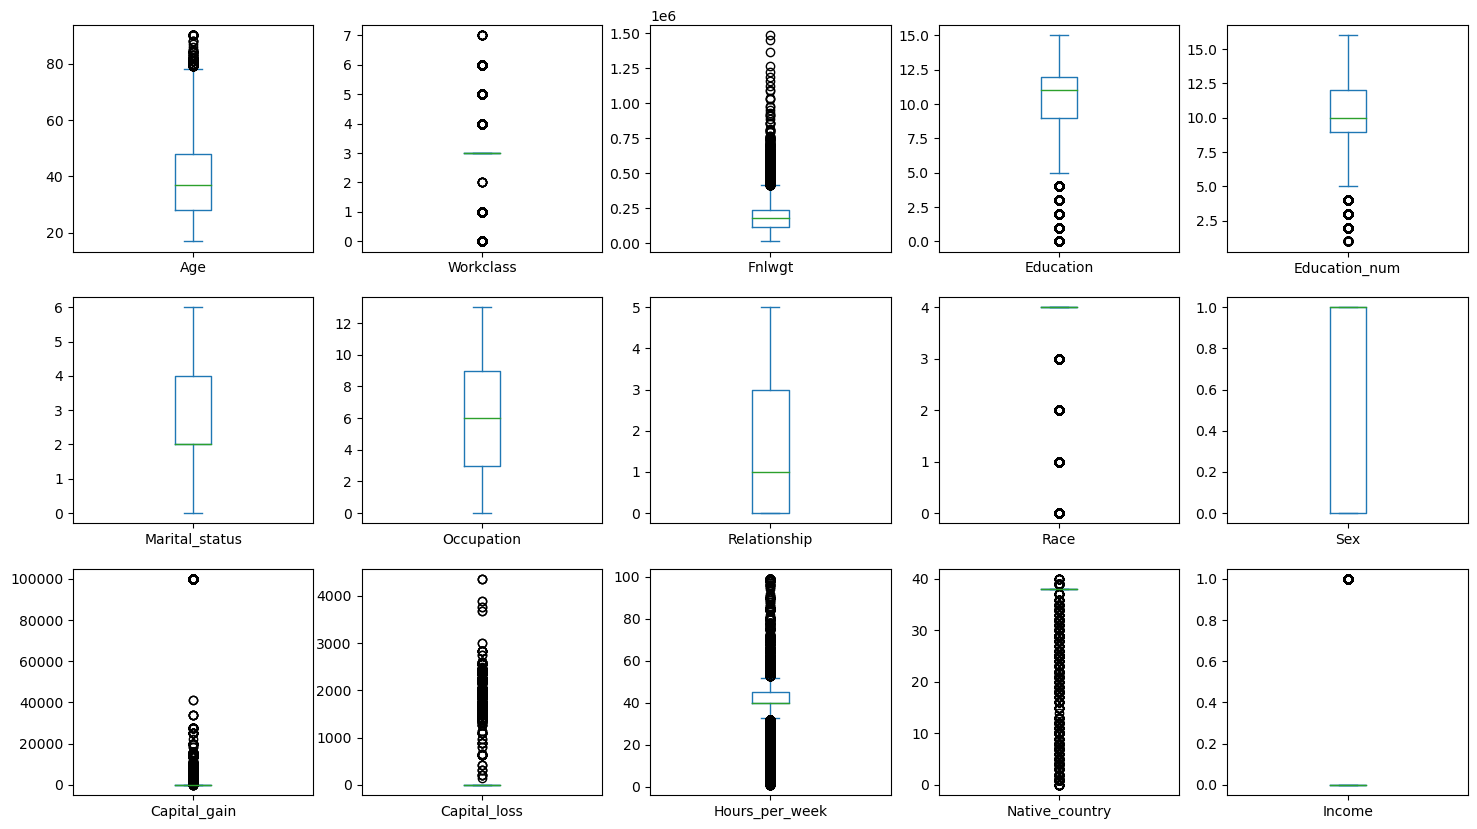

In [40]:
Census_ds.plot(kind='box',subplots=True,layout=(3,5),figsize=(18,10))

Outliers are present in the column "Age","Fnlwgt","Education","Race","Capital_gain","Capital_loss","Hours per week"

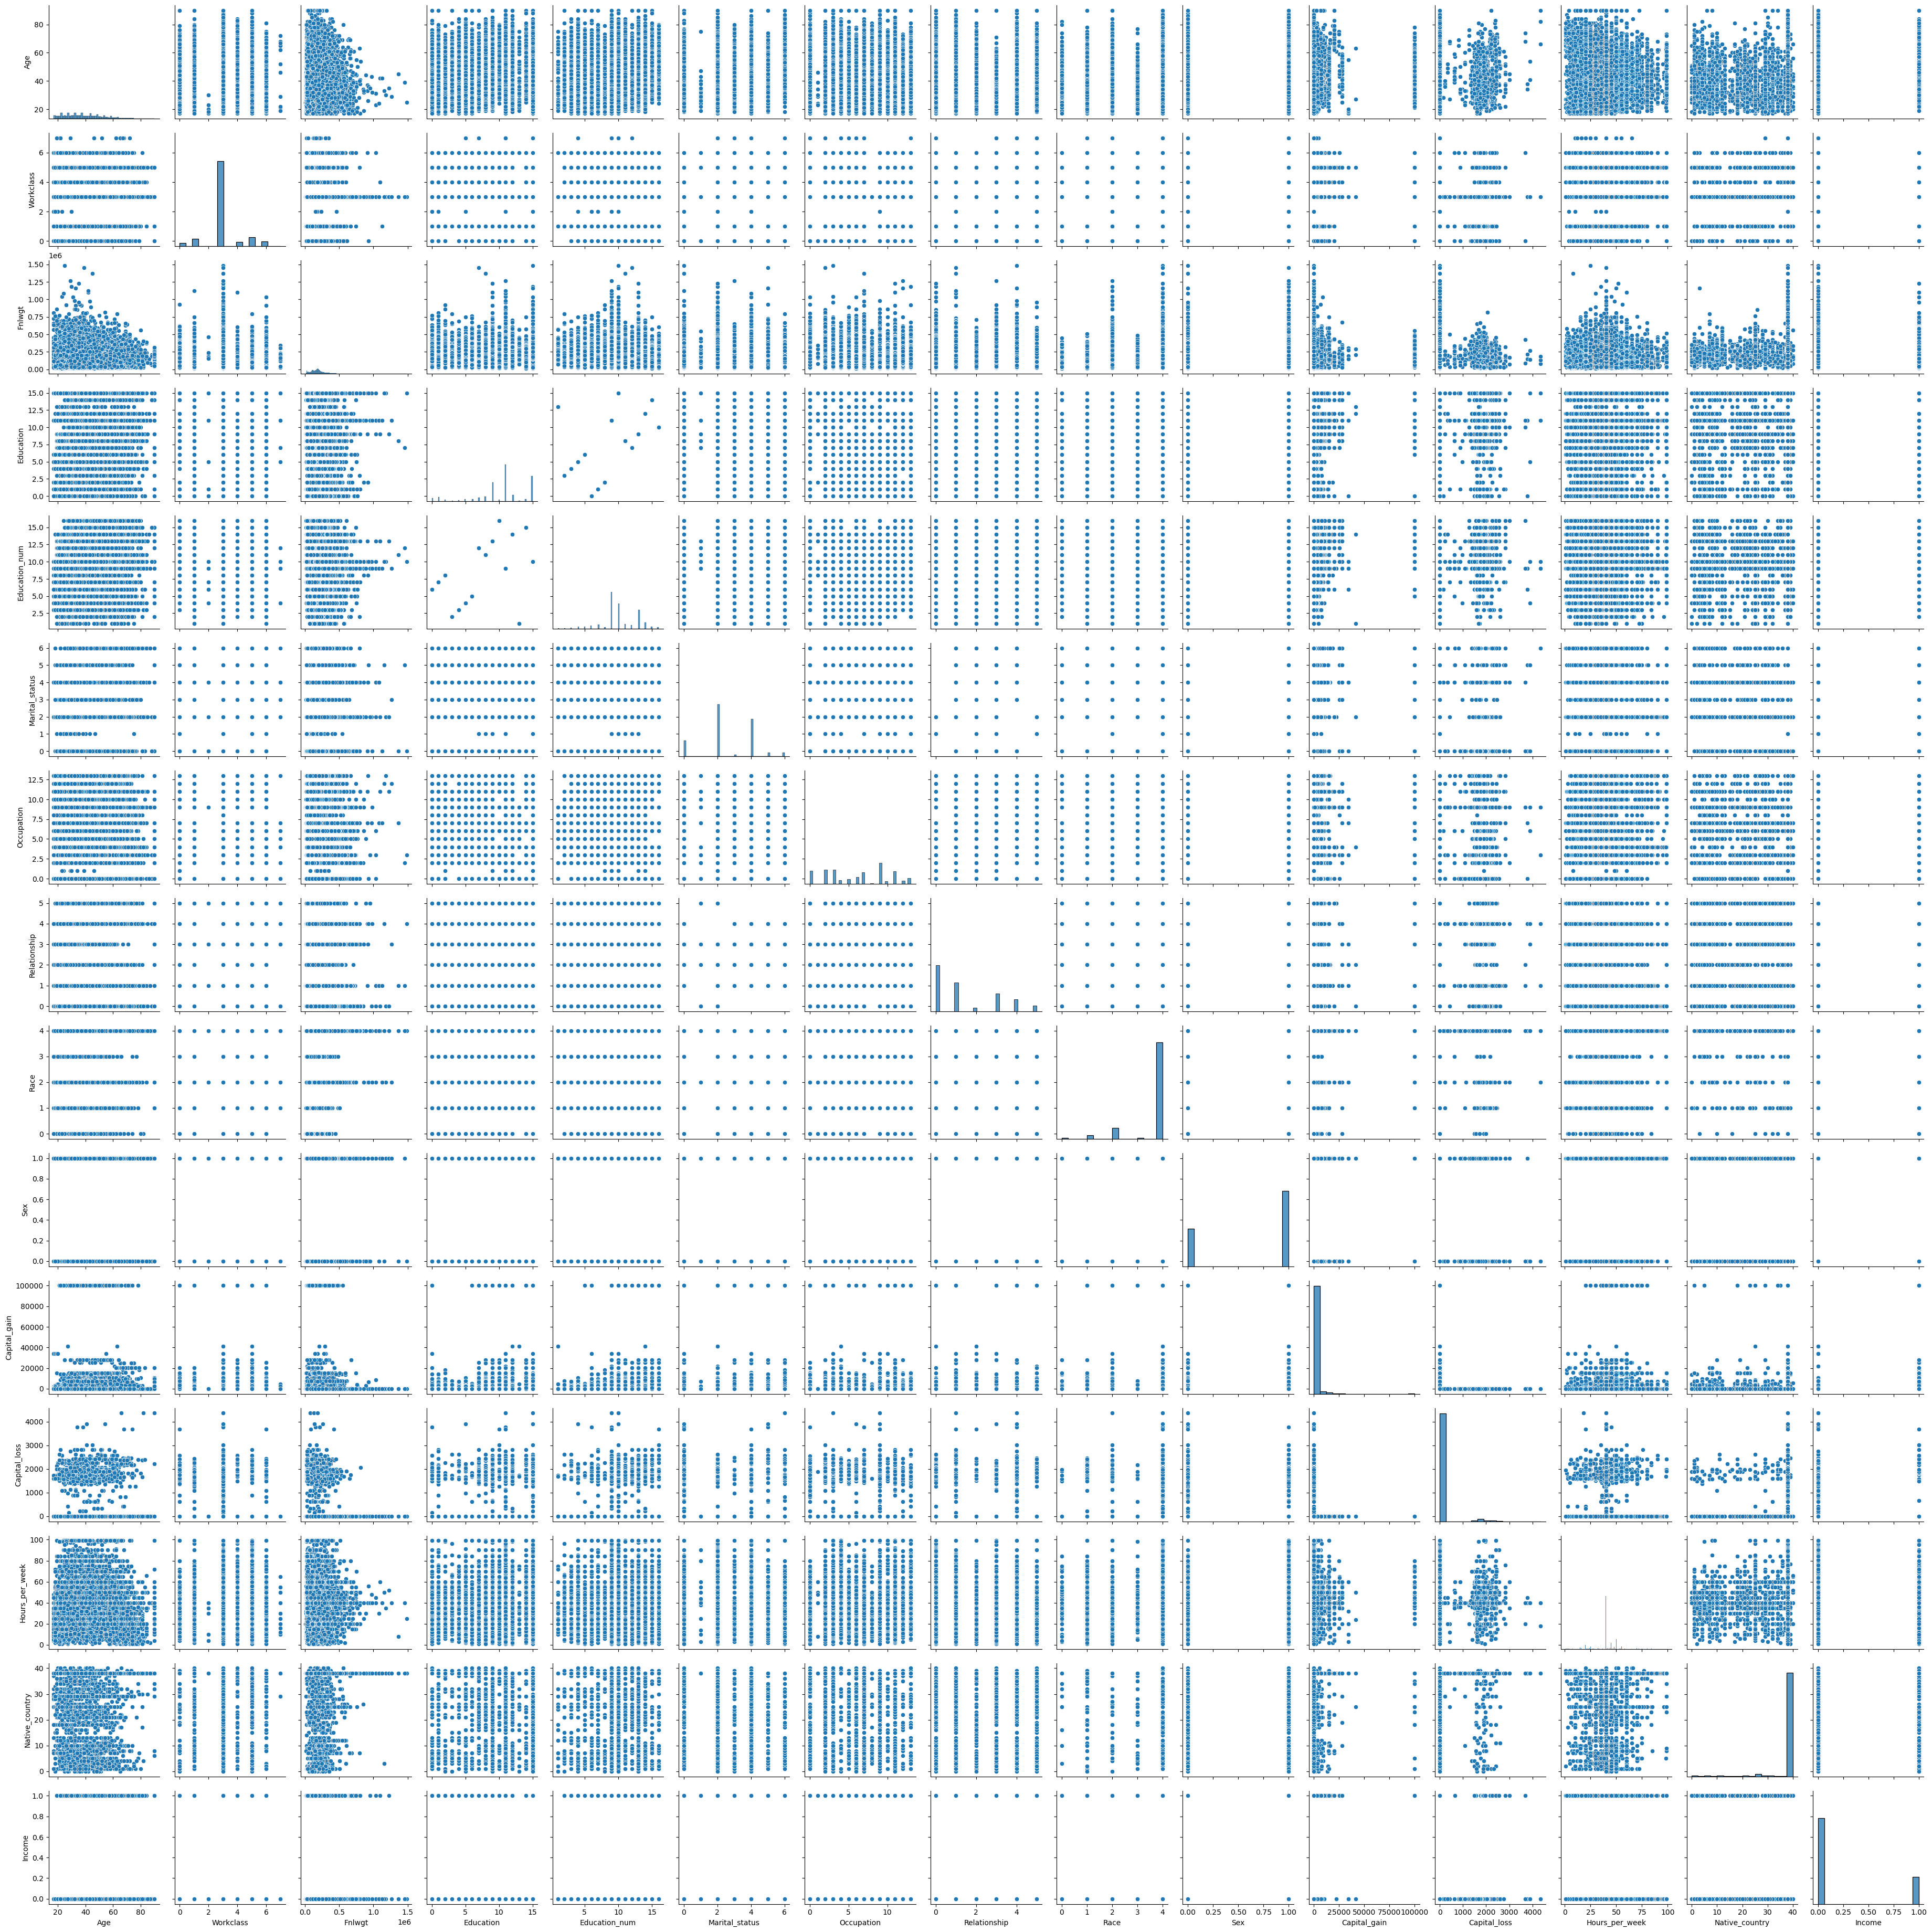

In [41]:
sns.pairplot(Census_ds)
plt.show()

Removing Outliers

In [42]:
from scipy.stats import zscore
z = np.abs(zscore(Census_ds))
threshold = 3
Census_ds_new = Census_ds[(z<3).all(axis = 1)]
Census_ds_new.shape

(27770, 15)

Variance Inflation Factor

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(Census_ds_new.values,i) for i in range(Census_ds_new.shape[1])]
vif['Features']= Census_ds_new.columns
vif

,VIF,Features
0,10.451315,Age
1,8.814231,Workclass
2,4.726173,Fnlwgt
3,9.315445,Education
4,24.028579,Education_num
5,4.374308,Marital_status
6,3.377264,Occupation
7,2.945477,Relationship
8,37.123229,Race
9,4.587601,Sex


Skewness

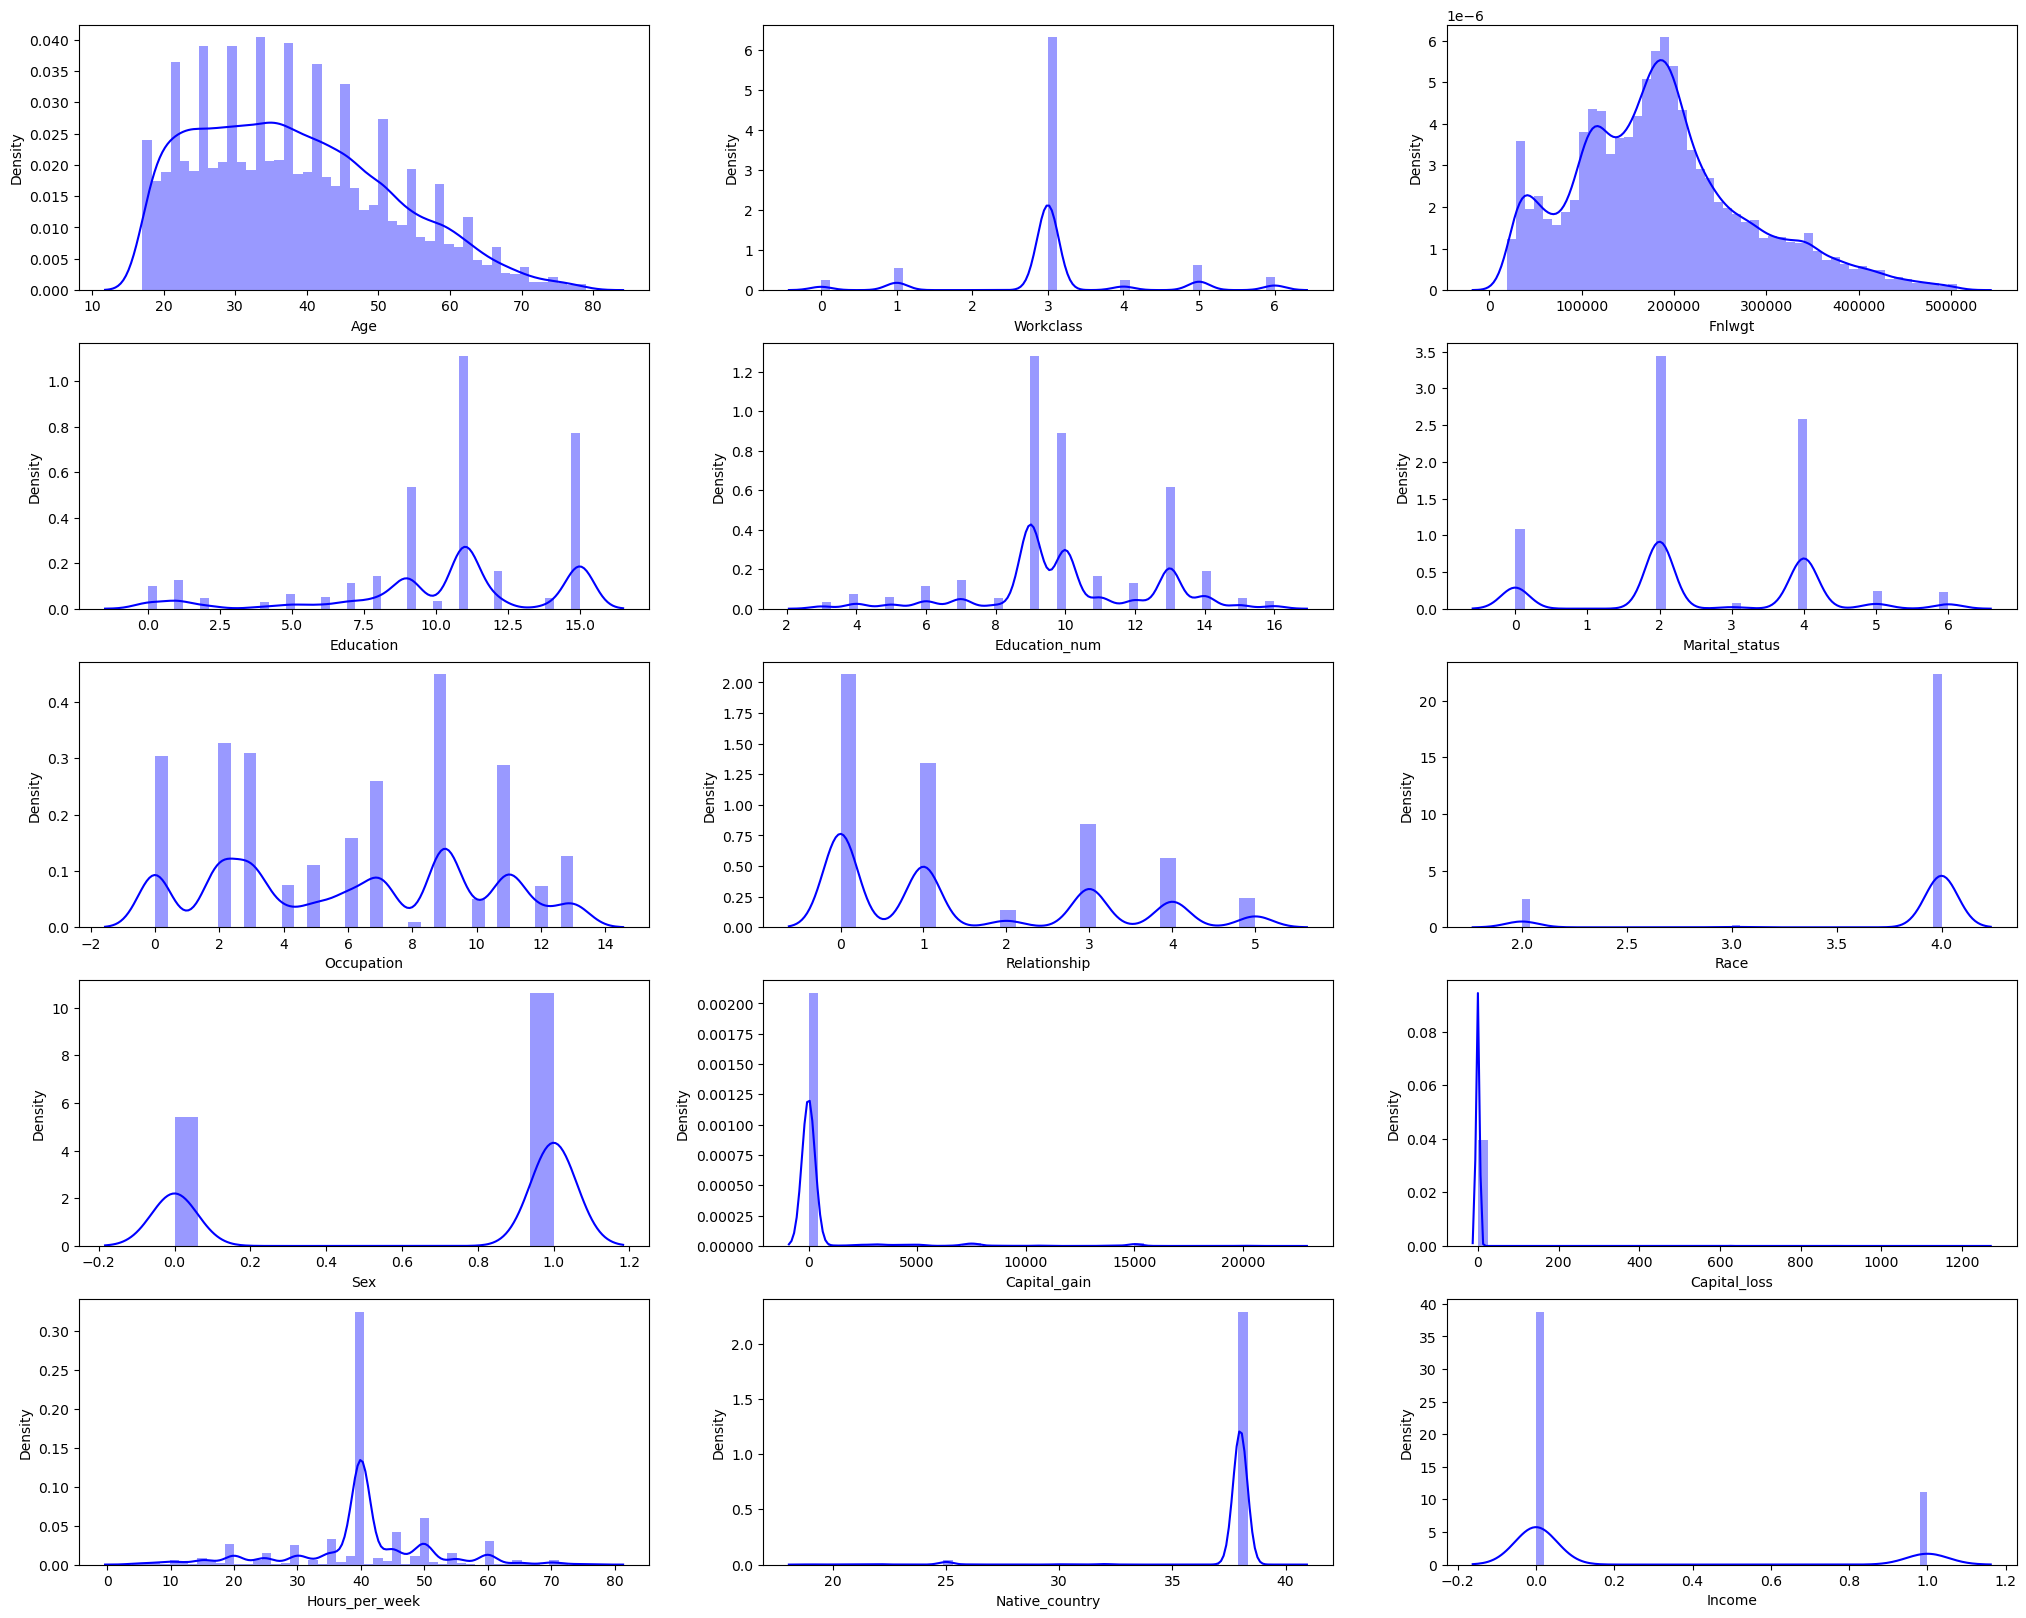

In [44]:
plt.figure(figsize=(25,20))
for i in enumerate(Census_ds_new.columns):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(Census_ds_new[i[1]],color='b')

In [45]:

Census_ds_new_skew=Census_ds_new.skew()
Census_ds_new_skew

Age                0.484817
Workclass          0.081968
Fnlwgt             0.627985
Education         -0.955755
Education_num     -0.146274
Marital_status    -0.045645
Occupation         0.013770
Relationship       0.753668
Race              -2.587044
Sex               -0.688946
Capital_gain       4.930671
Capital_loss      29.514547
Hours_per_week    -0.359841
Native_country    -5.405657
Income             1.322689
dtype: float64

In [46]:
from sklearn.preprocessing import power_transform

Census_ds_new[['Education','Relationship','Race','Sex','Capital_gain','Capital_loss','Native_country']]=power_transform(Census_ds_new[['Education','Relationship','Race','Sex','Capital_gain','Capital_loss','Native_country']],method='yeo-johnson')

In [47]:
Census_ds_new_skew=Census_ds_new.skew()
Census_ds_new_skew

Age                0.484817
Workclass          0.081968
Fnlwgt             0.627985
Education         -0.313492
Education_num     -0.146274
Marital_status    -0.045645
Occupation         0.013770
Relationship       0.109729
Race              -2.524439
Sex               -0.688946
Capital_gain       3.069288
Capital_loss      24.782637
Hours_per_week    -0.359841
Native_country     1.793856
Income             1.322689
dtype: float64

Model Prediction

In [48]:
x = Census_ds_new.drop("Income",axis=1)
y = Census_ds_new["Income"]

In [62]:
y.value_counts()

Income
0    21544
1     6226
Name: count, dtype: int64

In [63]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y = sm.fit_resample(x,y)

In [64]:
y.value_counts()

Income
0    21544
1    21544
Name: count, dtype: int64

Data Splitting

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

Model Training

In [66]:
Lg=LogisticRegression()
dtc=DecisionTreeClassifier(criterion='entropy')
gnb=GaussianNB()
ada = AdaBoostClassifier()
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
gb = GradientBoostingClassifier()
knn=KNeighborsClassifier()
etc=ExtraTreesClassifier()

model=(Lg,dtc,gnb,ada,rfc,gb,knn,etc)
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('Accuracy Score of',m,)
    print(accuracy_score(y_test,predict))
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict))

Accuracy Score of LogisticRegression()
0.7776643148904567
[[4055 1316]
 [1079 4322]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      5371
           1       0.77      0.80      0.78      5401

    accuracy                           0.78     10772
   macro avg       0.78      0.78      0.78     10772
weighted avg       0.78      0.78      0.78     10772

Accuracy Score of DecisionTreeClassifier(criterion='entropy')
0.8594504270330486
[[4568  803]
 [ 711 4690]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5371
           1       0.85      0.87      0.86      5401

    accuracy                           0.86     10772
   macro avg       0.86      0.86      0.86     10772
weighted avg       0.86      0.86      0.86     10772

Accuracy Score of GaussianNB()
0.7618826587448941
[[3698 1673]
 [ 892 4509]]
              precision    recall  f1-score   support

           0       0.

In [67]:
for i in model:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LogisticRegression()  model is : 0.7770843216789105
 
Cross Validation Score for  DecisionTreeClassifier(criterion='entropy')  model is : 0.8496582459780602
 
Cross Validation Score for  GaussianNB()  model is : 0.7654335974107431
 
Cross Validation Score for  AdaBoostClassifier()  model is : 0.8476613190724116
 
Cross Validation Score for  RandomForestClassifier(random_state=42)  model is : 0.9011106510838902
 
Cross Validation Score for  GradientBoostingClassifier()  model is : 0.8601010545114841
 
Cross Validation Score for  KNeighborsClassifier()  model is : 0.8590097998007199
 
Cross Validation Score for  ExtraTreesClassifier()  model is : 0.9103935904386061
 


HyperParameter Tuning

In [68]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_leaf': [1, 4],
    'max_features': ['auto', 'sqrt']
}


random_search_rfc = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, cv=5, n_jobs=-1)


random_search_rfc.fit(x_train, y_train)


best_params = random_search_rfc.best_params_
best_model = random_search_rfc.best_estimator_

y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score of RandomForestClassifier:", accuracy*100)




Accuracy Score of RandomForestClassifier: 89.97400668399554


Saving best Model

In [71]:
import pickle
filename = 'CensusIncome_best_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

In [70]:
import numpy as np
ac=np.array(y_test)
predicted=np.array(best_model.predict(x_test))
CensusData = pd.DataFrame({"original":ac,"predicted":predicted},index= range(len(ac)))
CensusData

,original,predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
10767,1,1
10768,0,0
10769,0,0
10770,0,0


The model "RandomForestClassifier and ExtraTreeClassifier" works best with Accuracy Score of 89.97 and 91.0